In [5]:

# Model Based approaches: Linear, Exponential, Additive, Multiplicative, Quadratic
# Data driven approaches: AR, MA, ARMA, ARIMA (p-order of auto regressive model, d-order of differencing, q-order of moving avg model)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (40,10)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('/content/exchange_rate.csv')

In [4]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


<Axes: >

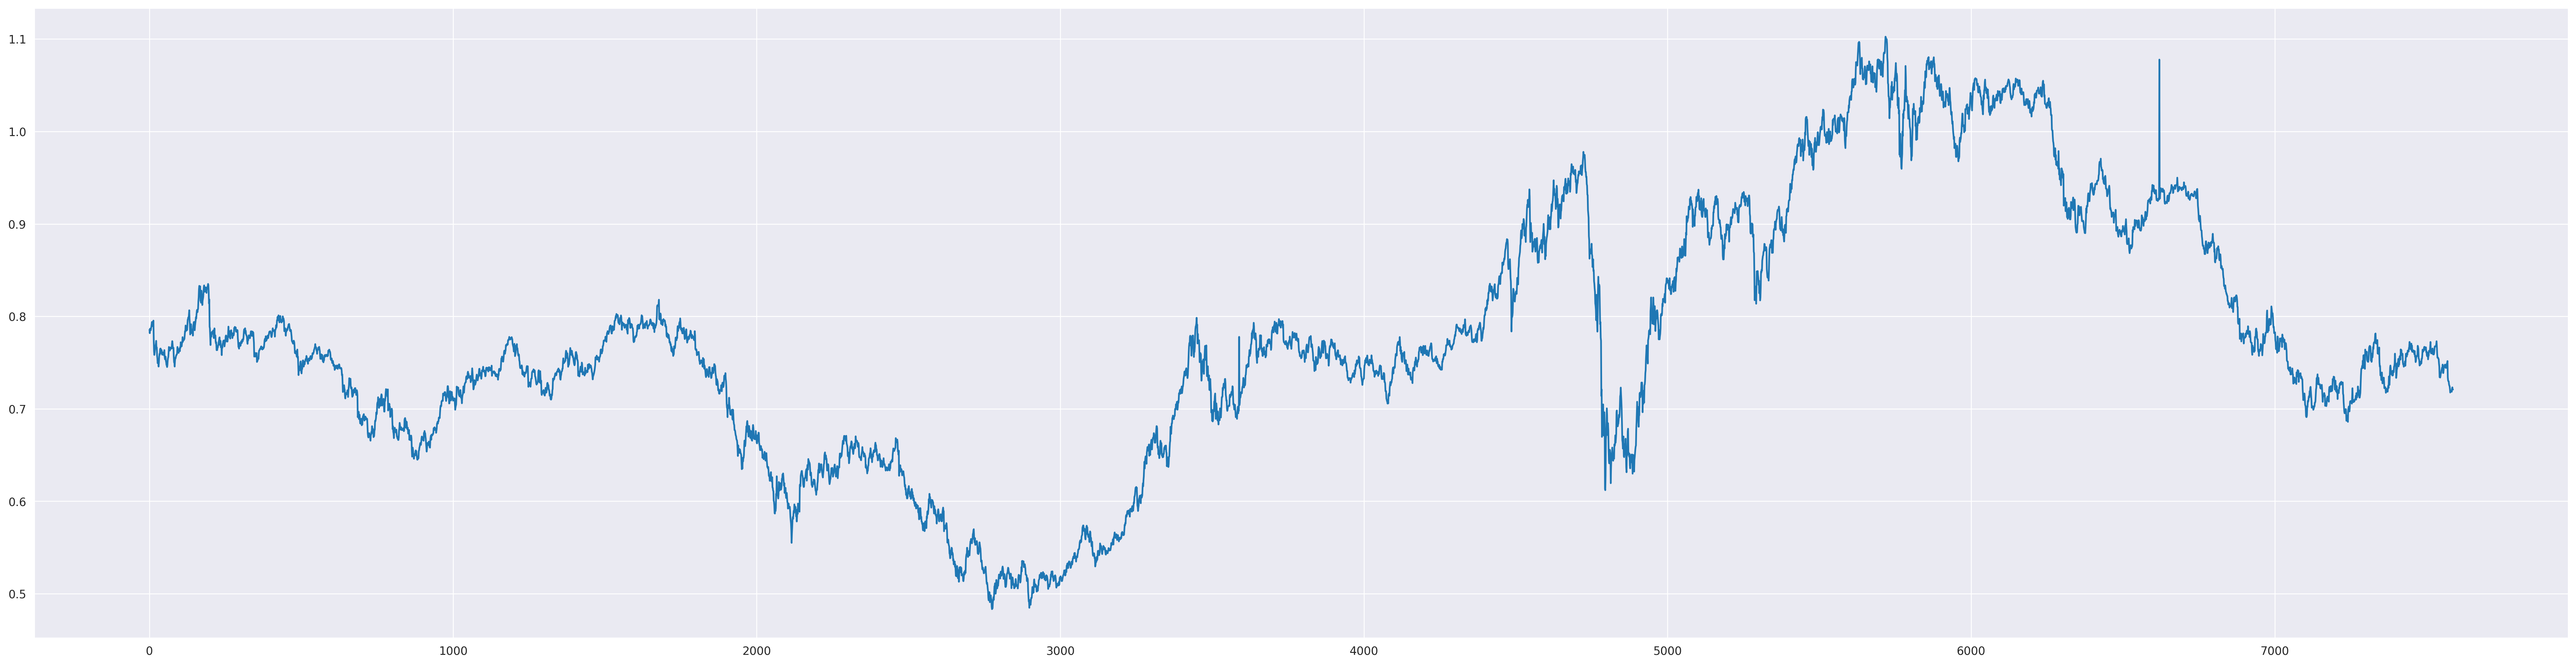

In [9]:
df.Ex_rate.plot()
# Trend = No Linear but quadratic kind of trend is there
# Seasonality = Additive, Non Stationary data - magnitude of cycle is changing.
# So you can select Additive Seasonality with Quadratic Trend Equation directly.


In [10]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [8]:
df.shape # 159 months and 17 columns


(7588, 2)

In [11]:
df.dtypes

,0
date,object
Ex_rate,float64


<Axes: xlabel='date', ylabel='Ex_rate'>

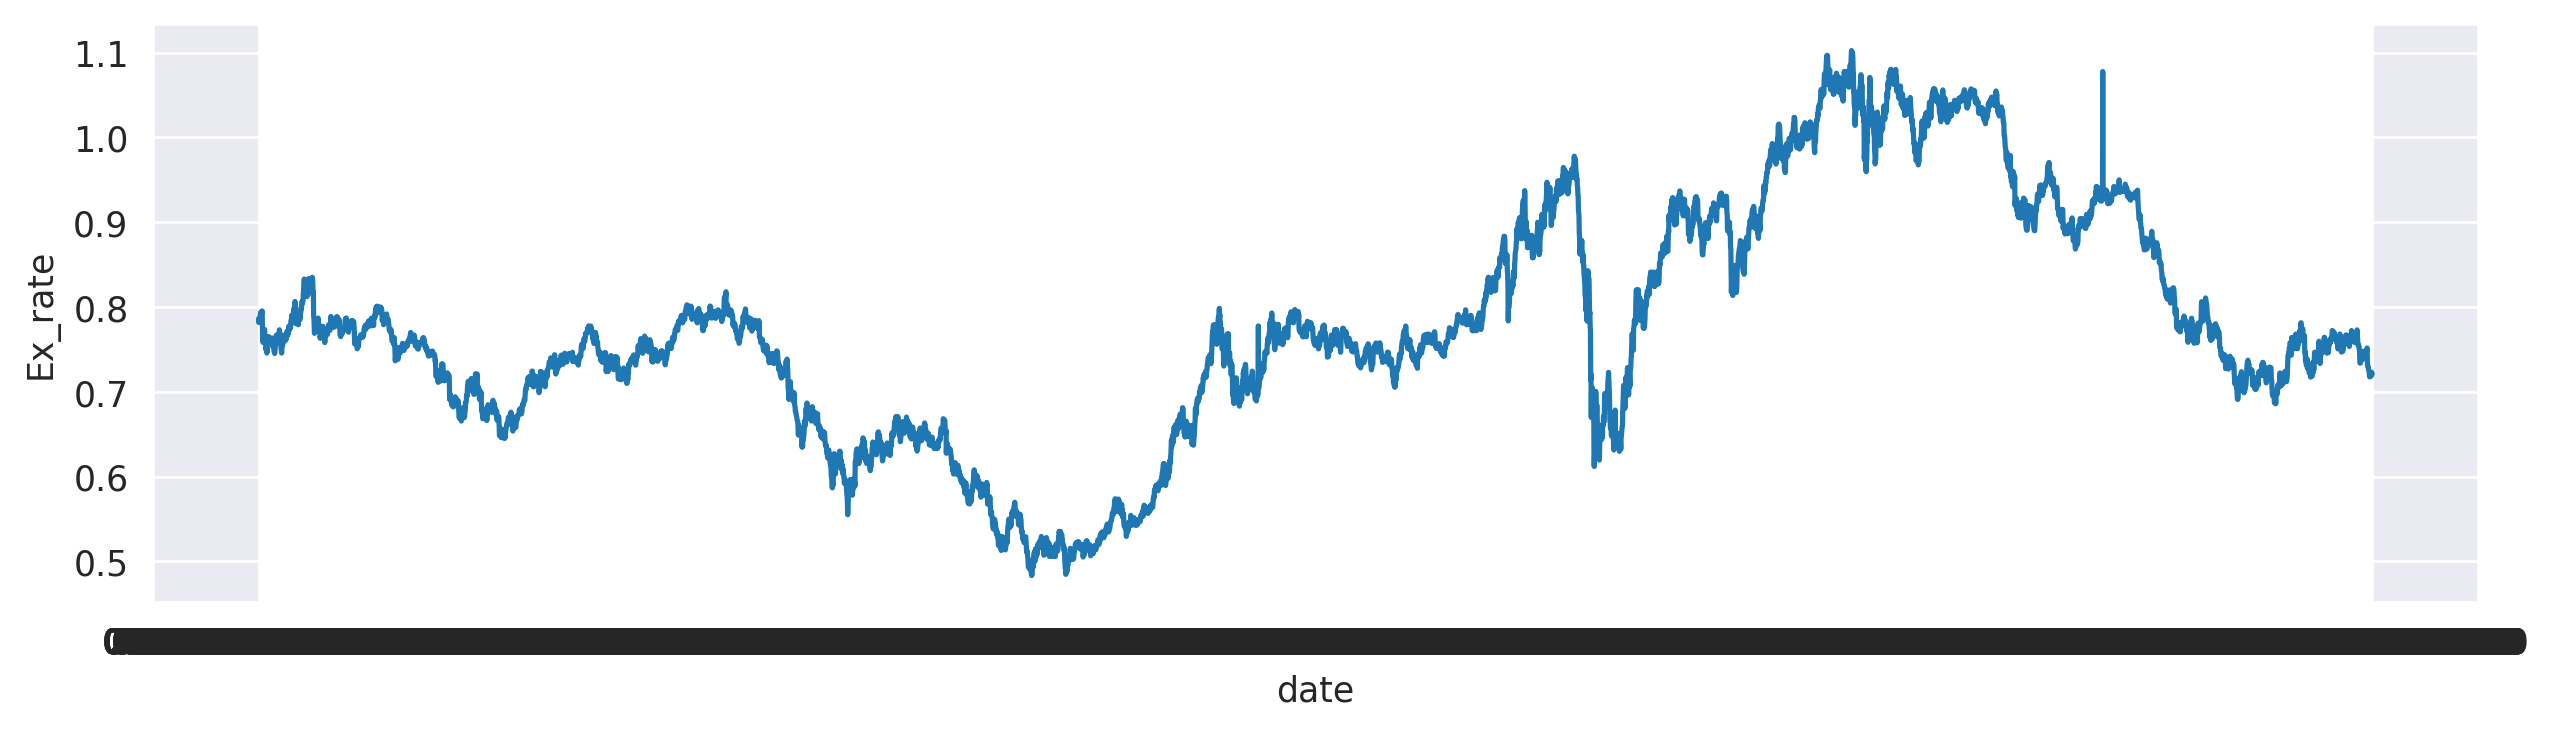

In [14]:

plt.figure(figsize=(12,3))
sns.lineplot(x="date",y="Ex_rate",data=df)
# from 91 to 96 footfall was decreasing, then increased till 2003...

#Data Splitting

In [39]:

train = df.head(7500)
test = df.tail(88)

In [21]:
train

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849
...,...,...
65,07-03-1990 00:00,0.7650
66,08-03-1990 00:00,0.7650
67,09-03-1990 00:00,0.7630
68,10-03-1990 00:00,0.7643


In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
# Linear Model
import statsmodels.formula.api as smf


# Ensure 'date' is treated as a numeric variable
train['date'] = pd.to_datetime(train['date'], format='%d-%m-%Y %H:%M') #convert to datetime, specify format
test['date'] = pd.to_datetime(test['date'], format='%d-%m-%Y %H:%M') #convert to datetime, specify format

train['date'] = train['date'].map(pd.Timestamp.toordinal) #convert to ordinal
test['date'] = test['date'].map(pd.Timestamp.toordinal) #convert to ordinal

# Assuming 'date' is the independent variable based on available data
linear_model = smf.ols('Ex_rate~date',data=train).fit() #Footfalls - target col, date - independent variable
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['date']))) # get prediction for test data
rmse_linear = np.sqrt(mean_squared_error(test['Ex_rate'],pred_linear)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_linear # RMSE should be minimum. try all models. Whichever model will give you min, RMSE that will be our final model

0.15271663911980446

In [42]:
# Exponential model

exp = smf.ols('Ex_rate~date',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['date']))) # get prediction for test data
rmse_exp = np.sqrt(mean_squared_error(test['Ex_rate'],pred_exp)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_exp

0.15271663911980446

In [43]:
# Quadratic Model

quad = smf.ols('Ex_rate~date',data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['date']])))
rmse_quad = np.sqrt(mean_squared_error(test['Ex_rate'],pred_quad))
rmse_quad

0.15271663911980446

In [44]:
# Additive Seasonality Model - Pass from Jan to Nov

add_sea = smf.ols('Ex_rate~date',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['date']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Ex_rate'],pred_add_sea))
rmse_add_sea

0.15271663911980446

In [45]:
# Additive Seasonality Quadratic Model
add_sea_quad = smf.ols('Ex_rate~date+date',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['date']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Ex_rate'],pred_add_sea_quad))
rmse_add_sea_quad

0.15271663911980446

In [46]:
# Multiplicative Seasonality

mul_sea = smf.ols('Ex_rate~date',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test[['date']]))
rmse_mul_sea = np.sqrt(mean_squared_error(test['Ex_rate'],pred_mul_sea))
rmse_mul_sea

0.15271663911980446

In [47]:

# Compare the results

data = {"MODEL":pd.Series(['Linear','Exponential','Quadratic','Additive Seas','Additive Seas Quad','Multiplicative Seas']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])
# RMSE value for additive seasonality with quadratic trend is giving less RMSE value so this model is good for this dataset.
# To predict the footfall for next 12 months additive seasonality with quadratic trend model should be used.

,MODEL,RMSE_Values
0,Linear,0.152717
1,Exponential,0.152717
2,Quadratic,0.152717
3,Additive Seas,0.152717
4,Additive Seas Quad,0.152717
5,Multiplicative Seas,0.152717
